<a href="https://colab.research.google.com/github/nethmi02/Smart-Helmet/blob/main/SmartBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

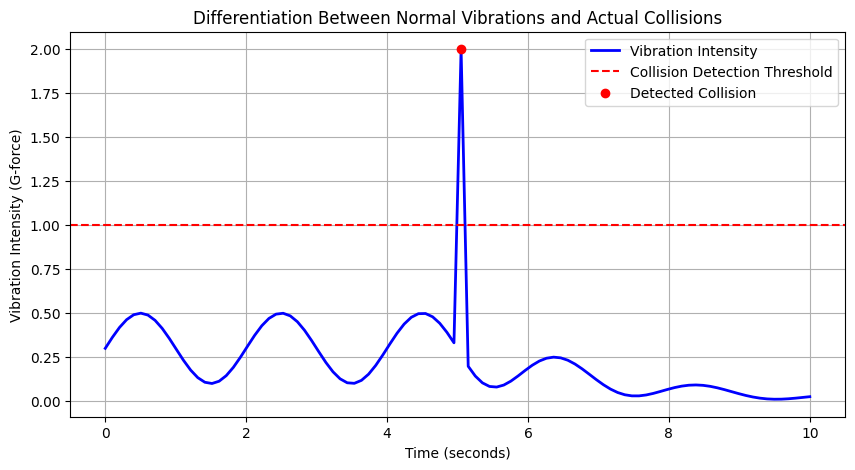

In [ ]:
# Generate time values (e.g., 100 time segments)
time = np.linspace(0, 10, 100)

# Generate normal vibrations (random oscillations between 0.1 and 0.5 G)
normal_vibrations = 0.3 + 0.2 * np.sin(2 * np.pi * time * 0.5)  # Smooth oscillations

# Introduce a collision spike at time index 50
collision_index = 50
vibration_intensity = normal_vibrations.copy()
vibration_intensity[collision_index] = 2.0  # Sharp spike above normal range

# Post-collision decay back to normal range
decay_factor = np.exp(-0.5 * (time - time[collision_index]))  # Exponential decay
decay_factor[time < time[collision_index]] = 1  # Apply decay only after the collision
vibration_intensity[collision_index+1:] *= decay_factor[collision_index+1:]

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(time, vibration_intensity, label="Vibration Intensity", color="blue", linewidth=2)

# Add threshold line
plt.axhline(y=1.0, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Mark the collision event
plt.scatter(time[collision_index], vibration_intensity[collision_index], color="red", zorder=3, label="Detected Collision")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Differentiation Between Normal Vibrations and Actual Collisions")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


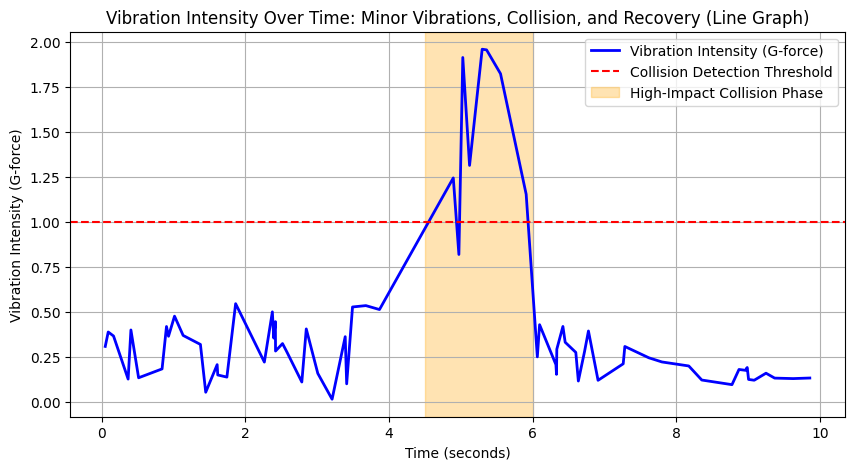

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 70 random time intervals between 0 and 10 seconds
# np.random.seed(42)
time = np.sort(np.random.uniform(0, 10, 70))

# Generate G-force values in different segments
g_force = np.zeros_like(time)

# Phase 1: Normal minor vibrations (0 to 4.5 sec) - Between 0 and 0.56 G
mask1 = time <= 4.5
g_force[mask1] = np.random.uniform(0, 0.56, np.sum(mask1))

# Phase 2: High-impact collision (4.5 to 6 sec) - Between 0.80 and 2 G
mask2 = (time > 4.5) & (time <= 6)
g_force[mask2] = np.random.uniform(0.80, 2.0, np.sum(mask2))

# Phase 3: Post-collision decay (6 to 10 sec) - Slowly reducing with noise
mask3 = time > 6
decay_factor = np.exp(-0.3 * (time[mask3] - 6))  # Exponential decay
g_force[mask3] = np.random.uniform(0.1, 0.5, np.sum(mask3)) * decay_factor

# Plot the data with direct point connections (no steps)
plt.figure(figsize=(10, 5))
plt.plot(time, g_force, linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")

# Add threshold line for collision detection
plt.axhline(y=1.0, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Highlight the peak impact zone (collision phase)
plt.axvspan(4.5, 6, color='orange', alpha=0.3, label="High-Impact Collision Phase")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Vibration Intensity Over Time: Minor Vibrations, Collision, and Recovery (Line Graph)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


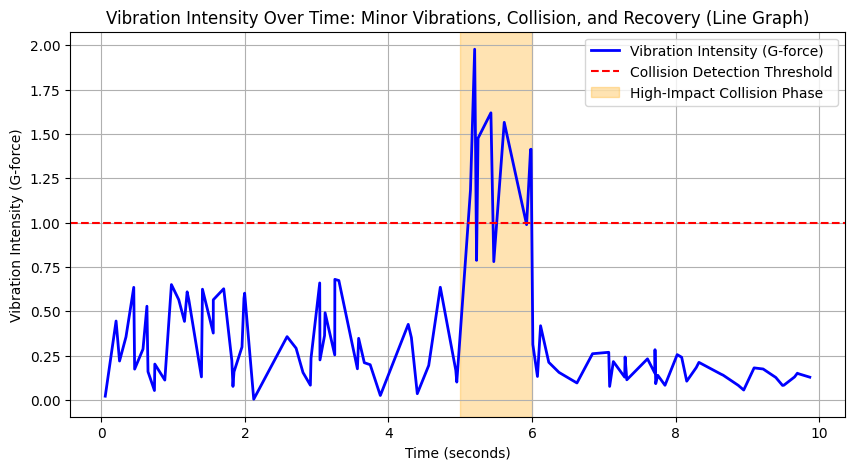

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Customizable Variables
num_points = 100  # Number of data points
time_range = (0, 10)  # Time interval range
collision_start, collision_end = 5, 6  # Collision phase time range
minor_vibration_range = (0, 0.7)  # G-force range for minor vibrations
collision_impact_range = (0.40, 2.0)  # G-force range for high impact
decay_rate = 0.3  # Decay rate for post-collision phase
post_collision_noise_range = (0.1, 0.5)  # Noise range for post-collision recovery

# Generate random time intervals
np.random.seed(42)
time = np.sort(np.random.uniform(*time_range, num_points))

# Generate G-force values in different segments
g_force = np.zeros_like(time)

# Phase 1: Normal minor vibrations (0 to collision_start sec)
mask1 = time <= collision_start
g_force[mask1] = np.random.uniform(*minor_vibration_range, np.sum(mask1))

# Phase 2: High-impact collision (collision_start to collision_end sec)
mask2 = (time > collision_start) & (time <= collision_end)
g_force[mask2] = np.random.uniform(*collision_impact_range, np.sum(mask2))

# Phase 3: Post-collision decay (collision_end to time_range[1])
mask3 = time > collision_end
decay_factor = np.exp(-decay_rate * (time[mask3] - collision_end))
g_force[mask3] = np.random.uniform(*post_collision_noise_range, np.sum(mask3)) * decay_factor

# Plot the data with direct point connections (no steps)
plt.figure(figsize=(10, 5))
# plt.plot(time, g_force, marker='o', linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")
plt.plot(time, g_force, linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")

# Add threshold line for collision detection
plt.axhline(y=1.0, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Highlight the peak impact zone (collision phase)
plt.axvspan(collision_start, collision_end, color='orange', alpha=0.3, label="High-Impact Collision Phase")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Vibration Intensity Over Time: Minor Vibrations, Collision, and Recovery (Line Graph)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


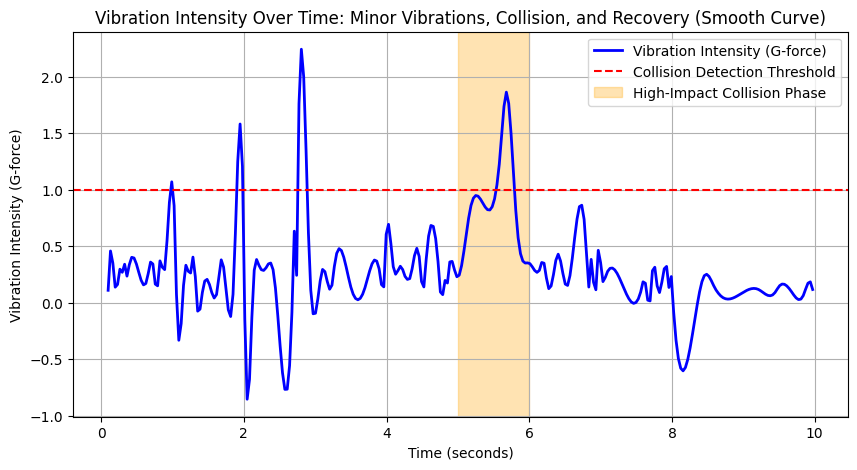

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Customizable Variables
num_points = 100  # Number of data points
time_range = (0, 10)  # Time interval range
collision_start, collision_end = 5, 6  # Collision phase time range
minor_vibration_range = (0.1, 0.4)  # G-force range for minor vibrations
collision_impact_range = (0.40, 2.0)  # G-force range for high impact
decay_rate = 0.3  # Decay rate for post-collision phase
post_collision_noise_range = (0.1, 0.5)  # Noise range for post-collision recovery

# Generate random time intervals
# np.random.seed(42)
time = np.sort(np.random.uniform(*time_range, num_points))

# Generate G-force values in different segments
g_force = np.zeros_like(time)

# Phase 1: Normal minor vibrations (0 to collision_start sec)
mask1 = time <= collision_start
g_force[mask1] = np.random.uniform(*minor_vibration_range, np.sum(mask1))

# Phase 2: High-impact collision (collision_start to collision_end sec)
mask2 = (time > collision_start) & (time <= collision_end)
g_force[mask2] = np.random.uniform(*collision_impact_range, np.sum(mask2))

# Phase 3: Post-collision decay (collision_end to time_range[1])
mask3 = time > collision_end
decay_factor = np.exp(-decay_rate * (time[mask3] - collision_end))
g_force[mask3] = np.random.uniform(*post_collision_noise_range, np.sum(mask3)) * decay_factor

# Create smooth curve using interpolation
smooth_time = np.linspace(time.min(), time.max(), 300)
smooth_g_force = make_interp_spline(time, g_force)(smooth_time)

# Plot the data with smoother curve
plt.figure(figsize=(10, 5))
plt.plot(smooth_time, smooth_g_force, linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")

# Add threshold line for collision detection
plt.axhline(y=1.0, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Highlight the peak impact zone (collision phase)
plt.axvspan(collision_start, collision_end, color='orange', alpha=0.3, label="High-Impact Collision Phase")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Vibration Intensity Over Time: Minor Vibrations, Collision, and Recovery (Smooth Curve)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

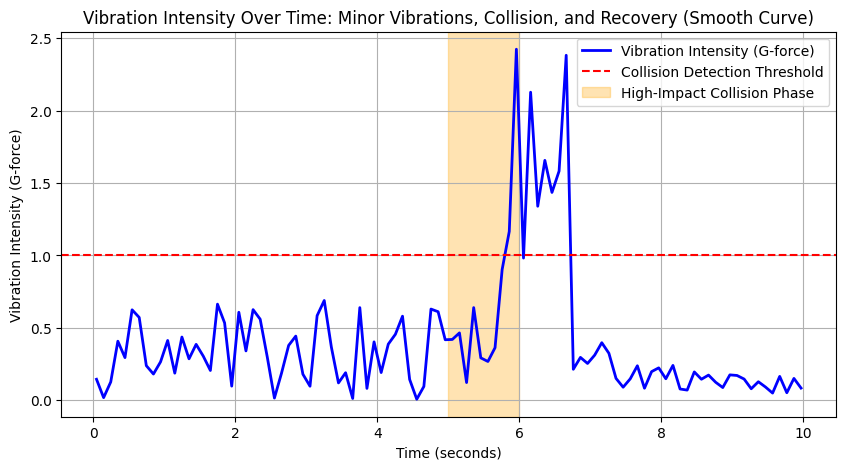

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Customizable Variables
num_points = 100  # Number of data points
time_range = (0, 10)  # Time interval range
collision_start, collision_end = 5, 6  # Collision phase time range
minor_vibration_range = (0, 0.7)  # G-force range for minor vibrations
collision_impact_range = (0.80, 3.0)  # G-force range for high impact
decay_rate = 0.3  # Decay rate for post-collision phase
post_collision_noise_range = (0.1, 0.5)  # Noise range for post-collision recovery

# Generate random time intervals
# np.random.seed(42)
time = np.sort(np.random.uniform(*time_range, num_points))

# Generate G-force values in different segments
g_force = np.zeros_like(time)

# Phase 1: Normal minor vibrations (0 to collision_start sec)
mask1 = time <= collision_start
g_force[mask1] = np.random.uniform(*minor_vibration_range, np.sum(mask1))

# Phase 2: High-impact collision (collision_start to collision_end sec)
mask2 = (time > collision_start) & (time <= collision_end)
g_force[mask2] = np.random.uniform(*collision_impact_range, np.sum(mask2))

# Phase 3: Post-collision decay (collision_end to time_range[1])
mask3 = time > collision_end
decay_factor = np.exp(-decay_rate * (time[mask3] - collision_end))
g_force[mask3] = np.random.uniform(*post_collision_noise_range, np.sum(mask3)) * decay_factor

# Ensure G-force values stay within defined limits
g_force = np.clip(g_force, 0, max(collision_impact_range[1], minor_vibration_range[1]))

# Create smooth curve using interpolation
smooth_time = np.linspace(time.min(), time.max(), 100)
smooth_g_force = make_interp_spline(time, g_force)(smooth_time)

# Plot the data with smoother curve
plt.figure(figsize=(10, 5))
plt.plot(smooth_time, g_force, linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")

# Add threshold line for collision detection
plt.axhline(y=1.0, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Highlight the peak impact zone (collision phase)
plt.axvspan(collision_start, collision_end, color='orange', alpha=0.3, label="High-Impact Collision Phase")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Vibration Intensity Over Time: Minor Vibrations, Collision, and Recovery (Smooth Curve)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

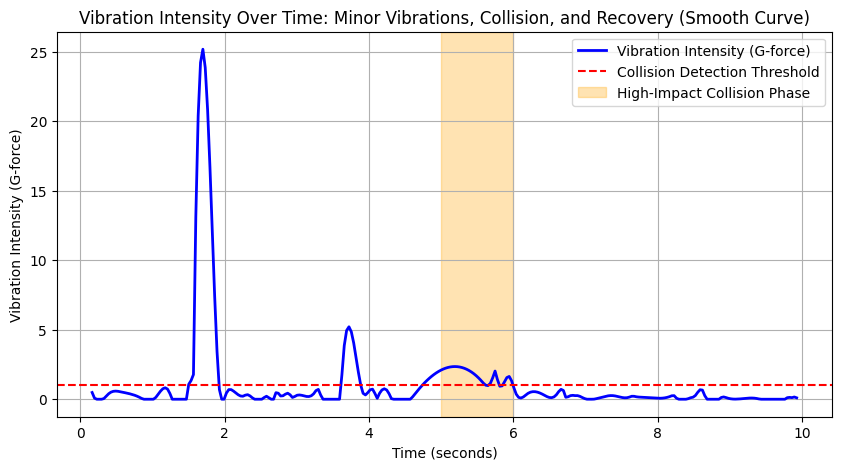

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Customizable Variables
num_points = 80  # Number of data points
time_range = (0, 10)  # Time interval range
collision_start, collision_end = 5, 6  # Collision phase time range
minor_vibration_range = (0, 0.7)  # G-force range for minor vibrations
collision_impact_range = (0.80, 2.0)  # G-force range for high impact
collision_threshold = 1.0  # Collision detection threshold
decay_rate = 0.3  # Decay rate for post-collision phase
post_collision_noise_range = (0.1, 0.5)  # Noise range for post-collision recovery

# Generate random time intervals
time = np.sort(np.random.uniform(*time_range, num_points))

# Generate G-force values in different segments
g_force = np.zeros_like(time)

# Phase 1: Normal minor vibrations (0 to collision_start sec) - must not exceed threshold
mask1 = time <= collision_start
g_force[mask1] = np.random.uniform(*minor_vibration_range, np.sum(mask1))
g_force[mask1] = np.maximum(g_force[mask1], 0)  # Ensure values are non-negative
g_force[mask1] = np.minimum(g_force[mask1], collision_threshold)  # Limit to threshold

# Phase 2: High-impact collision (collision_start to collision_end sec) - within impact range
mask2 = (time > collision_start) & (time <= collision_end)
g_force[mask2] = np.random.uniform(*collision_impact_range, np.sum(mask2))

# Ensure the spike is in the colored region by making it a peak in the middle of the collision phase
if np.any(mask2):
    max_impact_time = time[mask2][len(time[mask2]) // 2]  # Midpoint of collision phase
    max_impact_index = np.where(time == max_impact_time)[0][0]
    g_force[max_impact_index] = collision_impact_range[1]  # Set peak impact at max value

# Phase 3: Post-collision decay (collision_end to time_range[1]) - must not exceed threshold
mask3 = time > collision_end
decay_factor = np.exp(-decay_rate * (time[mask3] - collision_end))
g_force[mask3] = np.random.uniform(*post_collision_noise_range, np.sum(mask3)) * decay_factor
g_force[mask3] = np.maximum(g_force[mask3], 0)  # Ensure values are non-negative
g_force[mask3] = np.minimum(g_force[mask3], collision_threshold)  # Limit to threshold

# Create smooth curve using interpolation
smooth_time = np.linspace(time.min(), time.max(), 300)  # Increased smoothness
spline = make_interp_spline(time, g_force, k=3)  # Cubic spline for smooth interpolation
smooth_g_force = spline(smooth_time)

# Ensure no negative values without clipping artificially
smooth_g_force = np.where(smooth_g_force < 0, 0, smooth_g_force)  # Replace negative values with zero naturally

# Plot the data with smoother curve
plt.figure(figsize=(10, 5))
plt.plot(smooth_time, smooth_g_force, linestyle='-', color="blue", linewidth=2, label="Vibration Intensity (G-force)")

# Add threshold line for collision detection
plt.axhline(y=collision_threshold, color='red', linestyle='dashed', label="Collision Detection Threshold")

# Highlight the peak impact zone (collision phase)
plt.axvspan(collision_start, collision_end, color='orange', alpha=0.3, label="High-Impact Collision Phase")

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Vibration Intensity (G-force)")
plt.title("Vibration Intensity Over Time: Minor Vibrations, Collision, and Recovery (Smooth Curve)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
pip install graphviz


In [ ]:
from graphviz import Digraph

def create_flowchart():
    dot = Digraph("Heartbeat Monitor System")

    # Start node
    dot.node("Start", "Start", shape="oval", style="filled", fillcolor="lightblue")

    # Decision: Buckle On?
    dot.node("BuckleCheck", "Is the buckle on?", shape="diamond", style="filled", fillcolor="yellow")
    dot.edge("Start", "BuckleCheck")

    # If buckle is off
    dot.node("OffState", "System remains off", style="filled", fillcolor="gray")
    dot.edge("BuckleCheck", "OffState", label="No")

    # Decision: Heartbeat detected?
    dot.node("HeartbeatCheck", "Is heartbeat detected?", shape="diamond", style="filled", fillcolor="yellow")
    dot.edge("BuckleCheck", "HeartbeatCheck", label="Yes")

    # If no heartbeat is detected
    dot.node("NotInUse", "System is not in use", style="filled", fillcolor="gray")
    dot.edge("HeartbeatCheck", "NotInUse", label="No")

    # If heartbeat is detected
    dot.node("Monitor", "Start monitoring", style="filled", fillcolor="lightgreen")
    dot.edge("HeartbeatCheck", "Monitor", label="Yes")

    # Decision: Unusual heartbeat or high vibration?
    dot.node("AbnormalCheck", "Unusual heartbeat or high vibration?", shape="diamond", style="filled", fillcolor="yellow")
    dot.edge("Monitor", "AbnormalCheck")

    # If abnormal, emit SOS
    dot.node("EmitSOS", "Emit SOS with location", style="filled", fillcolor="red")
    dot.edge("AbnormalCheck", "EmitSOS", label="Yes")

    # If normal, emit periodic signal
    dot.node("EmitSignal", "Emit signal every 15s until unbuckled", style="filled", fillcolor="lightblue")
    dot.edge("AbnormalCheck", "EmitSignal", label="No")

    # Continuous loop
    dot.edge("EmitSignal", "Monitor", style="dashed", label="Continuous Monitoring")
    dot.edge("Monitor", "HeartbeatCheck", style="dashed", label="Check Heartbeat Continuously")

    return dot

# Generate and render the flowchart
flowchart = create_flowchart()
flowchart.render("heartbeat_monitor_flowchart", format="png", cleanup=True)

'heartbeat_monitor_flowchart.png'